**Nome:** Felipe Fonseca G. Neiva

### Funções úteis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def show_progress(i, x1, x2, f, coefficients, e):
    precision = 1 - int(np.log10(e))
    l = 1 + precision + max(len(str(x1).split('.')[0]), len(str(x2).split('.')[0]))
    print(f'Interação {i}')
    print(f'\tx1 = {x1:{l}.{precision}f} -> f(x1) = {f(x1, coefficients):{l}.{precision}f}')
    print(f'\tx2 = {x2:{l}.{precision}f} -> f(x2) = {f(x2, coefficients):{l}.{precision}f}')

def get_title(coefficients):
    superscripts = {
        0: '⁰',
        1: '¹',
        2: '²',
        3: '³',
        4: '⁴',
        5: '⁵',
        6: '⁶',
        7: '⁷',
        8: '⁸',
        9: '⁹',
    }
    format_power =  lambda x: ''.join(superscripts[int(i)] for i in str(x))

    terms = []
    degree = len(coefficients) - 1
    for i, c in enumerate(coefficients):
        if c == 0:
            continue
        p = degree - i
        c_str = f'{abs(c):.2f}'.rstrip('0').rstrip('.')

        if c == 1 and p != 0:
            term = f'x{format_power(p)}' if p > 1 else 'x'
        elif c == -1 and p != 0:
            term = f'-x{format_power(p)}' if p > 1 else '-x'
        else:
            term = f'{c_str}x{format_power(p)}' if p > 1 else (f'{c_str}x' if p == 1 else c_str)

        terms.append(f"{'-' if c < 0 else ''}{term}")

    title = ' + '.join(terms).replace(' + -', ' - ')
    return f'f(x) = {title}'

def plot_f(f, coefficients, interval, num_points=100):
    x = np.linspace(interval[0], interval[1], num_points)
    y = f(x, coefficients)
    title = get_title(coefficients)
    plt.plot(x, y)
    plt.grid()
    plt.xlim(interval[0], interval[1])
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.show()

### O Método da Seção Áurea

Trabalho 1: Estudar e implementar o algoritmo da seção áurea.

O Programa a ser definido deverá permitir ao usuário definir os coeficientes de polinômio de grau 5:

$$f(x) = a_1x^5 + a_2x^4 + a_3x^3 + a_4x^2 + a_5x + a_6$$

os extremos do intervalo [a, b] e a tolerância mínima do intervalo ($\varepsilon$).

In [2]:
def f(x, coefficients):
    return sum(c * x**p for p, c in enumerate(reversed(coefficients)))

def is_unimodal(f, coefficients, a, b, num_points):
    x_values = [a + i * (b - a) / num_points for i in range(num_points + 1)]
    f_values = [f(x, coefficients) for x in x_values]

    peak_found = False
    valley_found = False
    for i in range(1, len(f_values) - 1):
        if f_values[i] > f_values[i - 1] and f_values[i] > f_values[i + 1]:
            if peak_found or valley_found:
                return False
            peak_found = True
        elif f_values[i] < f_values[i - 1] and f_values[i] < f_values[i + 1]:
            if peak_found or valley_found:
                return False
            valley_found = True

    if peak_found:
        return True, True
    elif valley_found:
        return True, False
    else:
        return False, None

def golden_section_search(f, coefficients, interval, e=1e-5, num_points=1000, progress=True):
    counter = 0
    a, b = interval
    c = coefficients
    gr = (5**0.5 + 1) / 2
    unimodal, increasing = is_unimodal(f, c, a, b, num_points)

    if not unimodal:
        print('A função não é unimodal no intervalo dado.')
        return

    if progress:
        show_progress(counter, a, b, f, c, e)

    x1 = b - (b - a) / gr
    x2 = a + (b - a) / gr

    while abs(b - a) > e:
        counter += 1
        condition = f(x1, c) > f(x2, c) if increasing else f(x1, c) < f(x2, c)
        if condition:
            b = x2
        else:
            a = x1

        if progress:
            show_progress(counter, a, b, f, c, e)

        x1 = b - (b - a) / gr
        x2 = a + (b - a) / gr

    x, y = (a + b) / 2, f((a + b) / 2, c)
    return x, y

### Aplicações

Interação 0
	x1 = -10.000000 -> f(x1) = 142.000000
	x2 =  10.000000 -> f(x2) =  62.000000
Interação 1
	x1 = -2.360680 -> f(x1) = 17.015528
	x2 = 10.000000 -> f(x2) = 62.000000
Interação 2
	x1 = -2.360680 -> f(x1) = 17.015528
	x2 =  5.278640 -> f(x2) =  8.749483
Interação 3
	x1 = 0.557281 -> f(x1) = 0.081438
	x2 = 5.278640 -> f(x2) = 8.749483
Interação 4
	x1 = 0.557281 -> f(x1) = 0.081438
	x2 = 3.475242 -> f(x2) = 0.176338
Interação 5
	x1 = 0.557281 -> f(x1) = 0.081438
	x2 = 2.360680 -> f(x2) = -1.869910
Interação 6
	x1 = 1.246118 -> f(x1) = -1.431662
	x2 = 2.360680 -> f(x2) = -1.869910
Interação 7
	x1 = 1.671843 -> f(x1) = -1.892313
	x2 = 2.360680 -> f(x2) = -1.869910
Interação 8
	x1 = 1.671843 -> f(x1) = -1.892313
	x2 = 2.097567 -> f(x2) = -1.990481
Interação 9
	x1 = 1.834455 -> f(x1) = -1.972595
	x2 = 2.097567 -> f(x2) = -1.990481
Interação 10
	x1 = 1.934955 -> f(x1) = -1.995769
	x2 = 2.097567 -> f(x2) = -1.990481
Interação 11
	x1 = 1.934955 -> f(x1) = -1.995769
	x2 = 2.035455 -> f(x

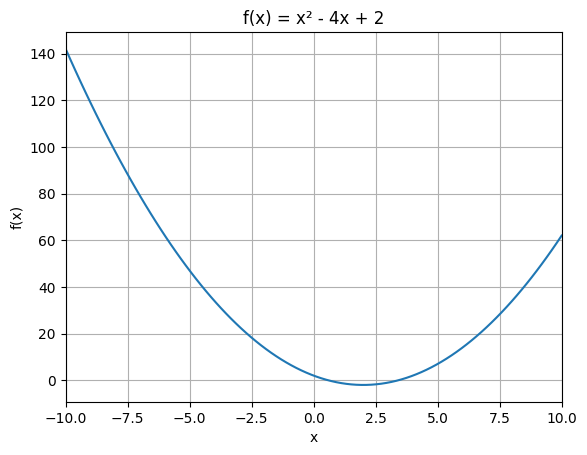

In [3]:
coefficients = 0, 0, 0, 1, -4, 2
interval = -10, 10
epsilon = 1e-5

x, y = golden_section_search(f, coefficients, interval, e=epsilon)
print(f'x = {x:.4f}\ny = {y:.4f}')
plot_f(f, coefficients, interval)

Interação 0
	x1 = -100.0000000 -> f(x1) = -50397.0000000
	x2 =  100.0000000 -> f(x2) = -49597.0000000
Interação 1
	x1 = -23.6067977 -> f(x1) = -2877.8316910
	x2 = 100.0000000 -> f(x2) = -49597.0000000
Interação 2
	x1 = -23.6067977 -> f(x1) = -2877.8316910
	x2 =  52.7864045 -> f(x2) = -13717.8768822
Interação 3
	x1 = -23.6067977 -> f(x1) = -2877.8316910
	x2 =  23.6067977 -> f(x2) = -2688.9773090
Interação 4
	x1 = -5.5728090 -> f(x1) = -174.5722368
	x2 = 23.6067977 -> f(x2) = -2688.9773090
Interação 5
	x1 = -5.5728090 -> f(x1) = -174.5722368
	x2 = 12.4611797 -> f(x2) = -723.5602848
Interação 6
	x1 = -5.5728090 -> f(x1) = -174.5722368
	x2 =  5.5728090 -> f(x2) = -129.9897648
Interação 7
	x1 = -1.3155617 -> f(x1) = -10.9157606
	x2 =  5.5728090 -> f(x2) = -129.9897648
Interação 8
	x1 = -1.3155617 -> f(x1) = -10.9157606
	x2 =  2.9416855 -> f(x2) = -28.5008259
Interação 9
	x1 = -1.3155617 -> f(x1) = -10.9157606
	x2 =  1.3155617 -> f(x2) = -0.3912666
Interação 10
	x1 = -0.3105620 -> f(x1) =  1

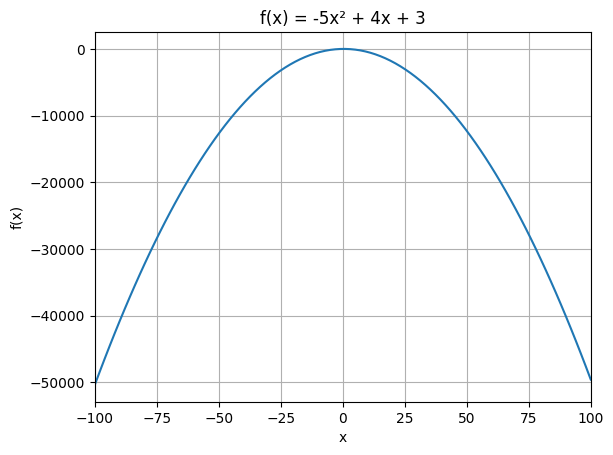

In [4]:
coefficients = 0, 0, 0, -5, 4, 3
interval = -100, 100
epsilon = 1e-6

x, y = golden_section_search(f, coefficients, interval, e=epsilon)
print(f'x = {x:.4f}\ny = {y:.4f}')
plot_f(f, coefficients, interval)

Interação 0
	x1 = -100.0000000 -> f(x1) = 1970001999603.0000000
	x2 =  100.0000000 -> f(x2) = 2029998000403.0000000
Interação 1
	x1 = -100.0000000 -> f(x1) = 1970001999603.0000000
	x2 =   23.6067977 -> f(x2) = 368108452.6923987
Interação 2
	x1 = -52.7864045 -> f(x1) = 42038353030.8939743
	x2 =  23.6067977 -> f(x2) = 368108452.6923987
Interação 3
	x1 = -23.6067977 -> f(x1) = 324172640.1565582
	x2 =  23.6067977 -> f(x2) = 368108452.6923987
Interação 4
	x1 = -23.6067977 -> f(x1) = 324172640.1565582
	x2 =   5.5728090 -> f(x2) = 75710.5035893
Interação 5
	x1 = -12.4611797 -> f(x1) = 6590753.8906394
	x2 =   5.5728090 -> f(x2) = 75710.5035893
Interação 6
	x1 = -5.5728090 -> f(x1) = 44108.7722129
	x2 =  5.5728090 -> f(x2) = 75710.5035893
Interação 7
	x1 = -5.5728090 -> f(x1) = 44108.7722129
	x2 =  1.3155617 -> f(x2) = 25.8982447
Interação 8
	x1 = -2.9416855 -> f(x1) = 677.3030208
	x2 =  1.3155617 -> f(x2) = 25.8982447
Interação 9
	x1 = -2.9416855 -> f(x1) = 677.3030208
	x2 = -0.3105620 -> f(x2

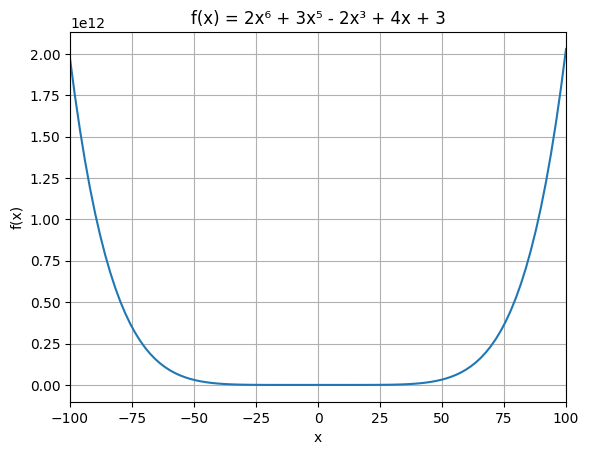

In [5]:
coefficients = 2, 3, 0, -2, 0, 4, 3
interval = -100, 100
epsilon = 1e-6

x, y = golden_section_search(f, coefficients, interval, e=epsilon)
print(f'x = {x:.4f}\ny = {y:.4f}')
plot_f(f, coefficients, interval)

Interação 0
	x1 = -100.0000 -> f(x1) = -10017667050793028.0000
	x2 =  100.0000 -> f(x2) = -9982332949146970.0000
Interação 1
	x1 = -23.6068 -> f(x1) = -97184306891.8643
	x2 = 100.0000 -> f(x2) = -9982332949146970.0000
Interação 2
	x1 = -23.6068 -> f(x1) = -97184306891.8643
	x2 =  52.7864 -> f(x2) = -60078130426694.9844
Interação 3
	x1 = -23.6068 -> f(x1) = -97184306891.8643
	x2 =  23.6068 -> f(x2) = -95713203331.8445
Interação 4
	x1 = -5.5728 -> f(x1) = -968936.8823
	x2 = 23.6068 -> f(x2) = -95713203331.8445
Interação 5
	x1 = -5.5728 -> f(x1) = -968936.8823
	x2 = 12.4612 -> f(x2) = -572578273.4073
Interação 6
	x1 = -5.5728 -> f(x1) = -968936.8823
	x2 =  5.5728 -> f(x2) = -891347.7175
Interação 7
	x1 = -5.5728 -> f(x1) = -968936.8823
	x2 =  1.3156 -> f(x2) = -18.6879
Interação 8
	x1 = -2.9417 -> f(x1) = -6139.3504
	x2 =  1.3156 -> f(x2) = -18.6879
Interação 9
	x1 = -2.9417 -> f(x1) = -6139.3504
	x2 = -0.3106 -> f(x2) =  2.8759
Interação 10
	x1 = -1.9367 -> f(x1) = -190.5895
	x2 = -0.310

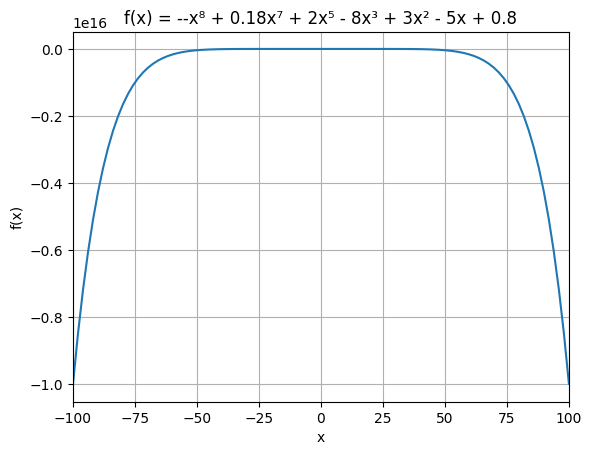

In [6]:
coefficients = -1, 3/17, 0, 2, 0, -8, 3, -5, 4/5
interval = -100, 100
epsilon = 1e-3

x, y = golden_section_search(f, coefficients, interval, e=epsilon)
print(f'x = {x:.4f}\ny = {y:.4f}')
plot_f(f, coefficients, interval)